<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [ ]:
#Importation de la librairie Pandas
import pandas as pd

In [ ]:
#Importation de la librairie plotly express
import plotly.express as px
import matplotlib.pyplot as plt
#Import de numpy
import numpy as np

In [ ]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
# Set the option to display all columns
pd.set_option('display.max_columns', None)


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [ ]:
#upload des trois fichiers
from google.colab import files
uploaded = files.upload()

Saving erp.xlsx to erp.xlsx
Saving liaison.xlsx to liaison.xlsx
Saving web.xlsx to web.xlsx


In [ ]:
import io
#Importation du fichier web.xlsx
#df_web = pd.read_excel(r"C:\cours\Projet6\données\web.xlsx")
df_web = pd.read_excel(io.BytesIO(uploaded['web.xlsx']))
#Importation du fichier erp.xlsx
df_erp = pd.read_excel(io.BytesIO(uploaded['erp.xlsx']))
#importation du fichier liaison.xlsx
df_liaison = pd.read_excel(io.BytesIO(uploaded['liaison.xlsx']))

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [ ]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))

Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [ ]:
#Consulter le nombre de colonnes
num_cols = df_erp.shape[1]
print(f"Nombre de colonnes: {num_cols}")
#La nature des données dans chacune des colonnes
print("\nNature des données dans chaque colonne:")
print(df_erp.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chaque colonne:")
print(df_erp.count())

Nombre de colonnes: 6

Nature des données dans chaque colonne:
product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object

Nombre de valeurs présentes dans chaque colonne:
product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [ ]:
#Afficher les 5 premières lignes de la table
df_erp.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [ ]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublon = df_erp[df_erp.duplicated(subset=['product_id'], keep=False)]
print(f"Nombre de lignes en double (incluant les originaux): {doublon.shape[0]}")

if not doublon.empty:
    print("Lignes en double:")
    display(doublon)
else:
    print("Aucune ligne en double trouvée dans la colonne 'product_id'")

Nombre de lignes en double (incluant les originaux): 0
Aucune ligne en double trouvée dans la colonne 'product_id'


In [ ]:
#Afficher les valeurs distinctes de la colonne stock_status
print(df_erp['stock_status'].unique())
#À quelle(s) autre(s) colonne(s) sont-elles liées ?

#autre colonne liée :stock_quantity

['instock' 'outofstock']


In [ ]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"
df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if x <= 0 else 'instock')


In [ ]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2
#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]

#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter

,0
0,True
1,True
2,True
3,True
4,False
...,...
820,True
821,True
822,True
823,True


In [ ]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0
#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
int((df_erp["stock_status"] == df_erp["stock_status_2"]).sum() )
#résultat 823, il manque 2 lignes non identique (erreur ennoncé il y a 825 lignes au total)

823

In [ ]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
##Dans ce cas je vous ce lien pour apprendre à réaliser des filtres dans Pandas:
##https://bitbucket.org/hrojas/learn-pandas/src/master/
##Lesson 3
df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,stock_status_2
4,4039,1,46.0,3,outofstock,23.77,instock
398,4885,1,18.7,0,instock,9.66,outofstock


In [ ]:
#Corriger la ou les données incohérentes
df_erp.loc[df_erp["stock_status"] != df_erp["stock_status_2"], "stock_status"] = df_erp["stock_status_2"]
#Verification en utilisant le même code que plus haut pour afficher les problemes
int((df_erp["stock_status"] == df_erp["stock_status_2"]).sum() )
#825 lignes identiques soit la totalité

825

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [ ]:
df_erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
 5   purchase_price  825 non-null    float64
 6   stock_status_2  825 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 45.2+ KB


In [ ]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?
#Afficher le ou les prix non renseignés dans la colonne "price"
print("Nombres d'article avec un prix non renseignés: {}".format(df_erp['price'].isnull().sum()))
print("Nombres d'article avec un prix égal à 0: {}".format(df_erp['price'].eq(0).sum()))
print("Nombres d'article avec un prix négatif:: {}".format(df_erp['price'].lt(0).sum()))

#Afficher le prix minimum de la colonne "price"
print("Prix minimum: {}".format(df_erp['price'].min()))
#Afficher le prix maximum de la colonne "price"
print("Prix maximum: {}".format(df_erp['price'].max()))
#Affichier les prix inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print("Prix inferieurs à 0:\n {}".format(df_erp.loc[df_erp['price'].lt(0),'price'].to_list()))
# les passer à 0
df_erp.loc[df_erp['price'].lt(0),'price']=0


Nombres d'article avec un prix non renseignés: 0
Nombres d'article avec un prix égal à 0: 0
Nombres d'article avec un prix négatif:: 3
Prix minimum: -20.0
Prix maximum: 225.0
Prix inferieurs à 0:
 [-20.0, -8.0, -9.1]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [ ]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity
#Afficher la quantité minimum de la colonne "stock_quantity"
print("QTE minimum: {}".format(df_erp['stock_quantity'].min()))
#Afficher la quantité maximum de la colonne "stock_quantity"
print("QTE maximum: {}".format(df_erp['stock_quantity'].max()))
#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
print("stocks inferieurs à 0:\n {}".format(df_erp.loc[df_erp['stock_quantity'].lt(0),'stock_quantity'].to_list()))

# les passer à 0
df_erp.loc[df_erp['stock_quantity'].lt(0),'stock_quantity']=0

QTE minimum: -10
QTE maximum: 145
stocks inferieurs à 0:
 [-10, -1]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [ ]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
print("Valeurs de ONSALE_WEB: {}".format(df_erp['onsale_web'].unique()))
#Valeurs de 0 ou 1. Si 1 alors le produit est en vente sur le net.

Valeurs de ONSALE_WEB: [1 0]


In [ ]:
#Quelles sont les colonnes à conserver selon vous?
print("Liste des colonnes:{}".format(df_erp.columns.to_list()))
#stock_status_2 peut être supprimé maintenant qu'il a été utilisé pour remettre les données à jour les données de stock_status

Liste des colonnes:['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status', 'purchase_price', 'stock_status_2']


In [ ]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns=['stock_status_2'])
print("Liste des colonnes:{}".format(df_erp.columns.to_list()))

Liste des colonnes:['product_id', 'onsale_web', 'price', 'stock_quantity', 'stock_status', 'purchase_price']


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [ ]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price :
#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
print("Prix null: {}".format(df_erp['purchase_price'].isnull().sum()))
print("Prix à 0: {}".format(df_erp['purchase_price'].eq(0).sum()))
print("Prix négatifs: {}".format(df_erp['purchase_price'].lt(0).sum()))
#Afficher le prix minimum de la colonne "purchase_price"
print("Prix Minimum: {}".format(df_erp['purchase_price'].min()))
#Afficher le prix maximum de la colonne "purchase_price"
print("Prix Maximum: {}".format(df_erp['purchase_price'].max()))

Prix null: 0
Prix à 0: 0
Prix négatifs: 0
Prix Minimum: 2.74
Prix Maximum: 137.81


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>


In [ ]:
#Dimension du dataset
print("Dimension du dataset: {}".format(df_web.shape))
#Nombre d'observations
print("Nombre d'observations: {}".format(df_web.shape[0]))
#Nombre de caractéristiques
print("Nombre de caractéristiques: {}".format(df_web.shape[1]))

Dimension du dataset: (1513, 29)
Nombre d'observations: 1513
Nombre de caractéristiques: 29


In [ ]:
#Consulter le nombre de colonnes
num_cols = df_web.shape[1]
print(f"Nombre de colonnes: {num_cols}")
#La nature des données dans chacune des colonnes
print("\nNature des données dans chaque colonne:")
print(df_web.dtypes)
#Le nombre de valeurs présentes dans chacune des colonnes
print("\nNombre de valeurs présentes dans chaque colonne:")
print(df_web.count())


Nombre de colonnes: 29

Nature des données dans chaque colonne:
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered           float64
post_parent     

In [ ]:
#Selon vous, quelles sont les colonnes à conserver ?
#on garde toutes les colonnes avec des valeurs:
print("A garder :")
print(df_web.columns[df_web.count().ne(0)].tolist())
#on supprime toutes celles completement vides:
print("A supprimer :")
print(df_web.columns[df_web.count().eq(0)].tolist())

A garder :
['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating', 'total_sales', 'tax_status', 'post_author', 'post_date', 'post_date_gmt', 'product_type', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_name', 'post_modified', 'post_modified_gmt', 'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count']
A supprimer :
['tax_class', 'post_content', 'post_password', 'post_content_filtered']


In [ ]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.drop(columns=df_web.columns[df_web.count().eq(0)])
print("Colonnes restantes:", df_web.columns.tolist())
print(f"Nombre de colonnes restantes: {df_web.shape[1]}")

Colonnes restantes: ['sku', 'virtual', 'downloadable', 'rating_count', 'average_rating', 'total_sales', 'tax_status', 'post_author', 'post_date', 'post_date_gmt', 'product_type', 'post_title', 'post_excerpt', 'post_status', 'comment_status', 'ping_status', 'post_name', 'post_modified', 'post_modified_gmt', 'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type', 'comment_count']
Nombre de colonnes restantes: 25


In [ ]:
#Visualisation des valeurs de la colonne sku
#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
df_web['sku'].unique().tolist()
#il y a des valeurs non numériques


[11862,
 16057,
 14692,
 16295,
 15328,
 15471,
 16515,
 16246,
 nan,
 13572,
 16513,
 16585,
 16269,
 15526,
 12869,
 15575,
 11586,
 14338,
 15425,
 16560,
 15361,
 13809,
 11587,
 15022,
 14323,
 16342,
 16029,
 15475,
 13754,
 14680,
 15875,
 9636,
 13849,
 13662,
 16564,
 13557,
 15429,
 14712,
 15032,
 15481,
 15448,
 16580,
 15441,
 804,
 15300,
 13958,
 16071,
 15678,
 13895,
 15711,
 12882,
 16053,
 13766,
 16247,
 12640,
 15292,
 15476,
 15670,
 16189,
 16038,
 14864,
 16044,
 15324,
 15531,
 15953,
 15413,
 15733,
 14366,
 15895,
 15892,
 16472,
 15185,
 16010,
 15793,
 15849,
 12315,
 15741,
 15934,
 15148,
 15781,
 15659,
 15106,
 15490,
 14507,
 14149,
 16307,
 13736,
 14090,
 16037,
 15758,
 14661,
 12587,
 15337,
 15489,
 15201,
 16305,
 16131,
 13435,
 15747,
 12203,
 14509,
 14768,
 16262,
 14561,
 16505,
 15717,
 16129,
 13460,
 15871,
 15940,
 11602,
 13127,
 13520,
 15480,
 13032,
 15436,
 15269,
 15910,
 19821,
 16263,
 15138,
 15146,
 15126,
 15482,
 16186,
 1390

In [ ]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
print('\nAffichage des lignes avec un SKU non numerique :')
print(df_web.loc[pd.to_numeric(df_web['sku'], errors='coerce').isna() & df_web['sku'].notna(),'sku'])


Affichage des lignes avec un SKU non numerique :
272                 13127-1
842     bon-cadeau-25-euros
1117                13127-1
1387    bon-cadeau-25-euros
Name: sku, dtype: object


In [ ]:
#Identifier les lignes sans code articles
df_webVide=df_web.loc[df_web['sku'].isnull()]
print("Nombre de lignes sans SKU: {}".format(df_webVide.shape[0]))

Nombre de lignes sans SKU: 85


In [ ]:
#Pour les codes articles identifiés, réalisez une analyse et définissez l'action à entreprendre
#Vérification des valeurs non numériques
df_merge=pd.merge(df_web, df_liaison, left_on='sku', right_on='id_web', how='left',indicator=True)

print(df_merge['_merge'].unique().tolist())

#resultat de la colonne _merge indique que l'ensemble des SKU existent dans la table de liaison (valeur BOTH )
#Un SKU est composé de valeurs numériques et alpha donc pas de soucis.

# pour les valeurs avec un SKU vide par contre, on va les supprimer, sans clef on ne peux rien en faire
df_web = df_web.dropna(subset=['sku'])

#On verifie qu'il n'y a plus de lignes vides
df_web.loc[df_web['sku'].isnull()]





['both']


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count


In [ ]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
int(df_web.duplicated('sku').sum())
#714 valeurs en doublons

714

In [ ]:
#on va chercher les doublons en prenant exemple sur la premiere ligne dont le SKU=11862
#df_web['sku'].drop_duplicates(keep='first', inplace=True)
df_web.loc[df_web['sku']==11862]
#On remarque qu'il existe 2 valeurs pour post_type: Product et attachement


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,11862,0,0,0,0.0,3.0,NaN,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,NaN,publish,closed,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1001,11862,0,0,0,0.0,3.0,taxable,2.0,2018-02-12 13:46:23,2018-02-12 12:46:23,Vin,Gilles Robin Hermitage Rouge 2012,Une robe rubis intense avec une très belle bri...,publish,closed,closed,gilles-robin-hermitage-2012,2019-01-31 12:12:56,2019-01-31 11:12:56,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [ ]:
#on va faire un filtre pour en garder que les posts de type produit
df_web=df_web[df_web['post_type'] == 'product']
int(df_web.duplicated('sku').sum())
#il n'y a plus de doublons

0

In [ ]:
#On verifie à nouveau le dataset
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 2 to 1509
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  product_type       713 non-null    object        
 11  post_title         714 non-null    object        
 12  post_excerpt       714 non-null    object        
 13  post_status        714 non-null    object        
 14  comment_status

In [ ]:
#post_mime_type est vide (il n'etait rempli que pour les lignes attachement (piece jointe))
#on supprime la colonne
df_web = df_web.drop(columns=df_web.columns[df_web.count().eq(0)])
df_web.info()
#résultat ok on a 714 valeurs dans chaque colonnes

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 2 to 1509
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   virtual            714 non-null    int64         
 2   downloadable       714 non-null    int64         
 3   rating_count       714 non-null    int64         
 4   average_rating     714 non-null    float64       
 5   total_sales        714 non-null    float64       
 6   tax_status         714 non-null    object        
 7   post_author        714 non-null    float64       
 8   post_date          714 non-null    datetime64[ns]
 9   post_date_gmt      714 non-null    datetime64[ns]
 10  product_type       713 non-null    object        
 11  post_title         714 non-null    object        
 12  post_excerpt       714 non-null    object        
 13  post_status        714 non-null    object        
 14  comment_status

In [ ]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article
#Df_webvide créé a l'etape de verification des lignes vides
#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_webVide.info()
#3 - Que constatez-vous?
#Je constate qu'il n'y a que le SKU de vide, le reste est rempli. Il ne sera
#cependant pas possible d'utiliser ces données sans clé pour la jointure

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 8 to 1457
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                0 non-null      object        
 1   virtual            85 non-null     int64         
 2   downloadable       85 non-null     int64         
 3   rating_count       85 non-null     int64         
 4   average_rating     2 non-null      float64       
 5   total_sales        2 non-null      float64       
 6   tax_status         2 non-null      object        
 7   post_author        2 non-null      float64       
 8   post_date          2 non-null      datetime64[ns]
 9   post_date_gmt      2 non-null      datetime64[ns]
 10  product_type       2 non-null      object        
 11  post_title         2 non-null      object        
 12  post_excerpt       2 non-null      object        
 13  post_status        2 non-null      object        
 14  comment_status 

In [ ]:
#verification de DF_web
df_web.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt,post_parent,menu_order,comment_count
count,714.0,714.0,714.0,714.0,714.000000,714.000000,714,714,714,714,714.0,714.0,714.0
mean,0.0,0.0,0.0,0.0,8.054622,1.998599,2018-08-22 03:57:52.950980352,2018-08-22 02:29:08.581232640,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.000000,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,5.000000,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,2020-06-18 18:32:35,2020-06-18 16:32:35,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,8.000000,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,11.000000,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,2020-08-25 10:32:32,2020-08-25 08:32:32,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,36.000000,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,4.161344,0.037424,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [ ]:
# des colonnes ont un min et un max à 0, et n'ont donc que des 0 comme valeurs. On va les suppriemr, ce sont des colonnes qui ne serivirons pas dans l'analyse

colonnes_zeros = df_web.columns[df_web.eq(0).all()]
df_web=df_web.drop(columns=colonnes_zeros)
print (f"les colonnes suivantes ont été supprimées : {colonnes_zeros}")

les colonnes suivantes ont été supprimées : Index(['virtual', 'downloadable', 'rating_count', 'average_rating',
       'post_parent', 'menu_order', 'comment_count'],
      dtype='object')


In [ ]:
#verification à nouveau de DF_web
df_web.describe()

,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt
count,714.000000,714.000000,714,714,714,714
mean,8.054622,1.998599,2018-08-22 03:57:52.950980352,2018-08-22 02:29:08.581232640,2020-06-20 21:45:25.694678016,2020-06-20 19:51:53.929972224
min,0.000000,1.000000,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23
25%,5.000000,2.000000,2018-02-27 20:01:12.500000,2018-02-27 19:01:12.500000,2020-06-18 18:32:35,2020-06-18 16:32:35
50%,8.000000,2.000000,2018-04-19 14:52:10,2018-04-19 12:52:10,2020-08-04 09:30:06.500000,2020-08-04 07:30:06.500000
75%,11.000000,2.000000,2019-01-31 14:35:47,2019-01-31 13:35:47,2020-08-25 10:32:32,2020-08-25 08:32:32
max,36.000000,2.000000,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03
std,4.161344,0.037424,NaN,NaN,NaN,NaN


In [ ]:
#verification des null
df_web.info()
#il y a une valeure null dans la colonne product_type
#affichage de la ligne
display(df_web.loc[df_web['product_type'].isnull()])
#on va créer un type "bon cadeau" pour ce produit
df_web.loc[df_web['product_type'].isnull(),'product_type']='Bon cadeau'

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 2 to 1509
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   sku                714 non-null    object        
 1   total_sales        714 non-null    float64       
 2   tax_status         714 non-null    object        
 3   post_author        714 non-null    float64       
 4   post_date          714 non-null    datetime64[ns]
 5   post_date_gmt      714 non-null    datetime64[ns]
 6   product_type       713 non-null    object        
 7   post_title         714 non-null    object        
 8   post_excerpt       714 non-null    object        
 9   post_status        714 non-null    object        
 10  comment_status     714 non-null    object        
 11  ping_status        714 non-null    object        
 12  post_name          714 non-null    object        
 13  post_modified      714 non-null    datetime64[ns]
 14  post_modified_

,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
1387,bon-cadeau-25-euros,7.0,taxable,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",publish,closed,closed,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,https://www.bottle-neck.fr/?post_type=product&...,product


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [ ]:
#Dimension du dataset
print("Dimension du dataset: {}".format(df_liaison.shape))
#Nombre d'observations
print("Nombre d'observations: {}".format(df_liaison.shape[0]))
#Nombre de caractéristiques
print("Nombre de caractéristiques: {}".format(df_liaison.shape[1]))

Dimension du dataset: (825, 2)
Nombre d'observations: 825
Nombre de caractéristiques: 2


In [ ]:
#Consulter le nombre de colonnes
print(f"Nombre de colonnes: {df_liaison.shape[1]}\n")
#La nature des données dans chacune des colonnes
print(f"Nature des données:\n {df_liaison.dtypes}\n")
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"Nbr de valeurs par colonnes:\n {df_liaison.count()}")


Nombre de colonnes: 2

Nature des données:
 id_web        object
product_id     int64
dtype: object

Nbr de valeurs par colonnes:
 id_web        734
product_id    825
dtype: int64


In [ ]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
print(f"Nombre de doublons :{df_liaison.duplicated('product_id').sum()}")
#Oui unique

Nombre de doublons :0


In [ ]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
print(f"Nombre de doublons :{df_liaison.duplicated('id_web').sum()}\n")
#Non pas unique
print(df_liaison.info())

Nombre de doublons :90

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_web      734 non-null    object
 1   product_id  825 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.0+ KB
None


In [ ]:
#Avons-nous des articles sans correspondances?
df_liaison[df_liaison['id_web'].isnull()]
# OUI 91 id_web null donc pas de correspondance pour les product ID

,id_web,product_id
19,NaN,4055
49,NaN,4090
50,NaN,4092
119,NaN,4195
131,NaN,4209
...,...,...
817,NaN,7196
818,NaN,7200
819,NaN,7201
820,NaN,7203


In [ ]:
#On va supprimer les lignes avec un Id_web null et reverifier les doublons
df_liaison = df_liaison.dropna(subset=['id_web'])
print(f"Nombre de doublons :{df_liaison.duplicated('id_web').sum()}\n")

Nombre de doublons :0



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [ ]:
#Fusion des fichiers df_erp et df_liaison
df_merge=pd.merge(df_erp, df_liaison, on='product_id', how='inner',indicator=True)
df_merge.head()


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,id_web,_merge
0,3847,1,24.2,16,instock,12.88,15298,both
1,3849,1,34.3,10,instock,17.54,15296,both
2,3850,1,20.8,0,outofstock,10.64,15300,both
3,4032,1,14.1,26,instock,6.92,19814,both
4,4039,1,46.0,3,instock,23.77,19815,both


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   product_id      734 non-null    int64   
 1   onsale_web      734 non-null    int64   
 2   price           734 non-null    float64 
 3   stock_quantity  734 non-null    int64   
 4   stock_status    734 non-null    object  
 5   purchase_price  734 non-null    float64 
 6   id_web          734 non-null    object  
 7   _merge          734 non-null    category
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 41.1+ KB


In [ ]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?
print(df_merge['_merge'].unique().tolist())
#Non il n'y a que 'Both' dans le champs _merge .
#De plus ici j'ai fait un inner join donc pas possible d'avoir le probleme, mais apres test un outer join affichera le même résulat
# suppression du champs _merge qui ne sert plus.
df_merge = df_merge.drop(columns=['_merge'])

['both']


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [ ]:
#Fusionnez les datasets df_merge et df_web
df_merge_final=pd.merge(df_merge, df_web, left_on='id_web', right_on='sku', how='left')
#je vais faire un left join ici pour garder les produits qui ne sont pas sur le web
#je supprime la colonne id_web qui est doublon de sku
df_merge_final = df_merge_final.drop(columns=['id_web'])
df_merge_final.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
0,3847,1,24.2,16,instock,12.88,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Vin,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,closed,closed,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product
1,3849,1,34.3,10,instock,17.54,15296,9.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Vin,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,closed,closed,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product
2,3850,1,20.8,0,outofstock,10.64,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Vin,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,closed,closed,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product
3,4032,1,14.1,26,instock,6.92,19814,12.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Vin,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,closed,closed,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product
4,4039,1,46.0,3,instock,23.77,19815,3.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Vin,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,closed,closed,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product


In [ ]:
#Avons-nous des lignes sans correspondances?
# nombre de lignes vides:
print (f"\nNombre de lignes completement vides du datataset: {df_merge_final.isna().all(axis=1).sum()}\n")
#resultat aucunes lignes completement vides
df_merge_final.info()
#734 lignes  dont 734-714 =20 produits pas sur le WEB.
#affichage des lignes avec un sku vide:
df_merge_vide=df_merge_final.loc[df_merge_final['sku'].isnull()]
df_merge_vide.head()




Nombre de lignes completement vides du datataset: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         734 non-null    int64         
 1   onsale_web         734 non-null    int64         
 2   price              734 non-null    float64       
 3   stock_quantity     734 non-null    int64         
 4   stock_status       734 non-null    object        
 5   purchase_price     734 non-null    float64       
 6   sku                714 non-null    object        
 7   total_sales        714 non-null    float64       
 8   tax_status         714 non-null    object        
 9   post_author        714 non-null    float64       
 10  post_date          714 non-null    datetime64[ns]
 11  post_date_gmt      714 non-null    datetime64[ns]
 12  product_type       714 non-null    object        
 13  post_title 

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
185,4289,0,22.8,0,outofstock,11.90,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
227,4568,0,21.5,0,outofstock,11.22,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
230,4584,0,32.3,0,outofstock,17.36,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
334,4741,0,12.4,0,outofstock,6.66,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
368,4864,0,8.3,0,outofstock,9.99,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [ ]:
#affichage des produits pas en vente, 2 produits sont en stock.Possible erreur du fichier de liaison
df_merge_vide.sort_values(by='stock_status')

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type
732,7329,0,26.5,14,instock,13.42,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
510,5559,0,27.9,3,instock,13.98,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
629,5957,0,39.0,0,outofstock,20.75,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
627,5955,0,27.3,0,outofstock,13.68,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
626,5954,0,18.8,0,outofstock,9.32,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
625,5953,0,47.5,0,outofstock,23.81,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
581,5800,0,32.3,0,outofstock,16.02,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
516,5570,0,22.5,0,outofstock,11.16,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
493,5505,0,10.1,0,outofstock,5.22,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
185,4289,0,22.8,0,outofstock,11.90,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN


In [ ]:
#produit non vendus, 2 lignes ont du stock (14*13,42+3*13,98 = 229,82 €).
 #"on va les isoler et les supprimer. les garder pour en parler lors de l'analyse"
df_merge_final.dropna(subset=['sku'], inplace=True)
df_merge_final.info()
#ok on a  714 valeurs non null partout

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 733
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   product_id         714 non-null    int64         
 1   onsale_web         714 non-null    int64         
 2   price              714 non-null    float64       
 3   stock_quantity     714 non-null    int64         
 4   stock_status       714 non-null    object        
 5   purchase_price     714 non-null    float64       
 6   sku                714 non-null    object        
 7   total_sales        714 non-null    float64       
 8   tax_status         714 non-null    object        
 9   post_author        714 non-null    float64       
 10  post_date          714 non-null    datetime64[ns]
 11  post_date_gmt      714 non-null    datetime64[ns]
 12  product_type       714 non-null    object        
 13  post_title         714 non-null    object        
 14  post_excerpt   

In [ ]:
#cas du bon cadeau. Pour l'analyse des prix et marges on va être gené par cette donnée, qui n'est pas une vente de produit directe, mais indirecte.
#Si besoin de l'utiliser plus tard il suffira de commenter la ligne ci dessous:
df_merge_final = df_merge_final[df_merge_final['product_type'] != 'Bon cadeau']

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

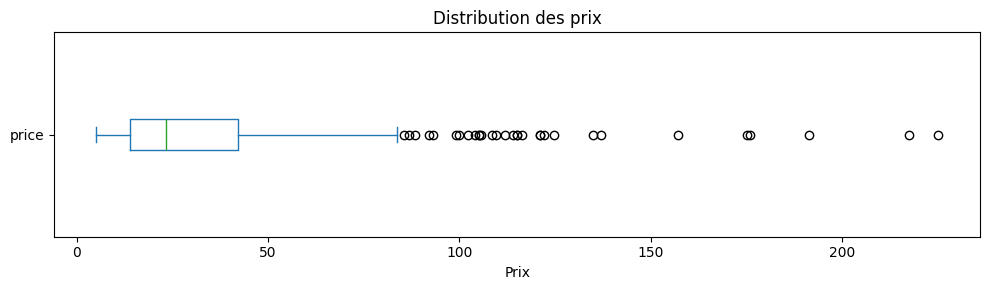

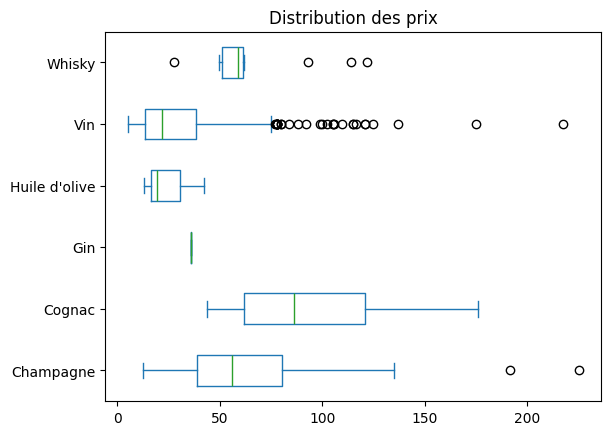

In [ ]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
#univariée
df_merge_final['price'].plot.box(vert=False, figsize=(10, 3))
plt.title('Distribution des prix')
plt.xlabel('Prix')
plt.tight_layout()
plt.show()
print("\n")
#Multivariée (type de produit)
df_merge_final.plot.box(column="price", by="product_type",vert=False)
plt.title('Distribution des prix')
plt.show()

In [ ]:
#Autre méthode avec plotly express
#univariée
graph1=px.box(df_merge_final, y="price")
graph1.update_layout(title_text="Distribution des prix")
graph1.show()
#multivariée
graph2=px.box(df_merge_final, x="price", y="product_type")
graph2.update_layout(title_text="Distribution des prix")
graph2.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [ ]:
#Calculer la moyenne du prix
moyenne = df_merge_final['price'].mean()
#Calculer l'écart-type du prix
ecart_type = df_merge_final['price'].std()
#Calculer le Z-score
z_score = (df_merge_final['price'] - moyenne) / ecart_type
#Le Z-score  permet d'identifier facilement les produits avec des prix inhabituellement élevés ou bas.
#Un Z-score supérieur à 2 ou inférieur à -2 est généralement considéré comme un prix atypique
print(f"Moyenne du prix: {moyenne:.2f}")
print(f"Écart-type du prix: {ecart_type:.2f}")
print("\nAperçu des Z-scores:")
print(z_score.head())
#Ajout du Z_score au dataset
df_merge_final['z_score']=z_score

Moyenne du prix: 32.34
Écart-type du prix: 27.61

Aperçu des Z-scores:
0   -0.294918
1    0.070834
2   -0.418043
3   -0.660670
4    0.494527
Name: price, dtype: float64


In [ ]:
#Quel est le seuil prix dont z-score est supérieur à 3?
seuil_prix_zscore=df_merge_final.loc[df_merge_final['z_score'] > 3,'price'].min()
print(f"Le seuil prix dont le Z-score est supérieur à 3 est de {seuil_prix_zscore:.2f}")
print("liste des z-score superieur à 3 :")
print(df_merge_final.loc[df_merge_final['z_score'] > 3,['post_title', 'z_score']])
#


Le seuil prix dont le Z-score est supérieur à 3 est de 116.40
liste des z-score superieur à 3 :
                                            post_title   z_score
200     Champagne Egly-Ouriet Grand Cru Millésimé 2008  6.976667
219                               Cognac Frapin VIP XO  5.202227
222  Cognac Frapin Château de Fontpinot 1989 20 Ans...  4.514178
387  Domaine Des Croix Corton Charlemagne Grand Cru...  3.789917
434     David Duband Charmes-Chambertin Grand Cru 2014  6.705069
524  Domaine Weinbach Gewurztraminer Grand Cru Furs...  3.348117
566                Camille Giroud Clos de Vougeot 2016  5.166014
601  Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...  5.756287
617  Wemyss Malts Single Cask Scotch Whisky Choc 'n...  3.246721
661             Champagne Gosset Célébris Vintage 2007  3.717491
667  Domaine Clerget Echezeaux Grand Cru En Orveaux...  3.043927
673  Domaine des Comtes Lafon Volnay 1er Cru Santen...  3.210507
676  Domaine des Comtes Lafon Volnay 1er Cru Champa...  3.2

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [ ]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_merge_final.describe()

,product_id,onsale_web,price,stock_quantity,purchase_price,total_sales,post_author,post_date,post_date_gmt,post_modified,post_modified_gmt,z_score
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.0,713,713,713,713,7.130000e+02
mean,5032.667602,0.998597,32.343969,23.446003,16.909060,8.056101,2.0,2018-08-22 06:42:39.412342272,2018-08-22 05:13:57.673211648,2020-06-21 23:00:47.277699840,2020-06-21 21:07:16.057503744,6.975875e-17
min,3847.000000,0.000000,5.200000,0.000000,2.740000,0.000000,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,2018-02-20 15:19:23,2018-02-20 14:19:23,-9.829666e-01
25%,4280.000000,1.000000,14.050000,9.000000,7.240000,5.000000,2.0,2018-02-27 14:18:27,2018-02-27 13:18:27,2020-06-19 17:55:02,2020-06-19 15:55:02,-6.624809e-01
50%,4795.000000,1.000000,23.400000,20.000000,12.280000,8.000000,2.0,2018-04-19 14:48:15,2018-04-19 12:48:15,2020-08-04 09:30:07,2020-08-04 07:30:07,-3.238886e-01
75%,5711.000000,1.000000,42.100000,30.000000,22.030000,11.000000,2.0,2019-01-31 14:39:08,2019-01-31 13:39:08,2020-08-25 10:35:02,2020-08-25 08:35:02,3.532959e-01
max,7338.000000,1.000000,225.000000,145.000000,137.810000,36.000000,2.0,2020-07-20 11:00:00,2020-07-20 09:00:00,2020-08-27 18:55:03,2020-08-27 16:55:03,6.976667e+00
std,791.060331,0.037450,27.614335,22.234835,14.837177,4.164078,0.0,NaN,NaN,NaN,NaN,1.000000e+00


In [ ]:
#Définissez un seuil pour les articles "outliers" en prix
#recherche: La méthode la plus classique utilise l'écart interquartile (IQR)
# Calculer Q1, Q3 et IQR
Q1 = df_merge_final['price'].quantile(0.25)
Q3 = df_merge_final['price'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")

# Définir les limites pour les outliers
seuil_inferieur = Q1 - 1.5 * IQR
seuil_superieur = Q3 + 1.5 * IQR

print(f"Seuil inférieur: {seuil_inferieur:.2f}")
print(f"Seuil supérieur: {seuil_superieur:.2f}")
outliers = df_merge_final[(df_merge_final['price'] < seuil_inferieur) | (df_merge_final['price'] > seuil_superieur)]


Q1: 14.05
Q3: 42.10
IQR: 28.05
Seuil inférieur: -28.03
Seuil supérieur: 84.18


In [ ]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"
print(f"Nombre d'outliers: {outliers.shape[0]}")
print(f"Proportion des outliers: {outliers.shape[0] / df_merge_final.shape[0] * 100:.2f} %")
outliers=outliers.sort_values(by='price', ascending=False)
outliers.reset_index(drop=True, inplace=True)
display(outliers[['post_title','product_type','price']].head(31).style.set_caption("Liste des outliers"))

Nombre d'outliers: 31
Proportion des outliers: 4.35 %


,post_title,product_type,price
0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Champagne,225.000000
1,David Duband Charmes-Chambertin Grand Cru 2014,Vin,217.500000
2,Coteaux Champenois Egly-Ouriet Ambonnay Rouge 2016,Champagne,191.300000
3,Cognac Frapin VIP XO,Cognac,176.000000
4,Camille Giroud Clos de Vougeot 2016,Vin,175.000000
5,Cognac Frapin Château de Fontpinot 1989 20 Ans d'Age,Cognac,157.000000
6,Domaine Des Croix Corton Charlemagne Grand Cru 2016,Vin,137.000000
7,Champagne Gosset Célébris Vintage 2007,Champagne,135.000000
8,Domaine Weinbach Gewurztraminer Grand Cru Furstentum SGN 2010 1/2,Vin,124.800000
9,Wemyss Malts Single Cask Scotch Whisky Choc 'n' Nut Pretzel 2001 Bunnahabhain,Whisky,122.000000


In [ ]:
#Selon vous, ces outliers sont-ils justifiés ? Comment le démontrer si cela est possible
print(f"liste des prix outliers {outliers['price'].unique()}")
Liste_mots="Grand Cru|Ans d'Age|Ans d'âge|XO|1er Cru|Vintage"
print(f"\nOn peux supposer qu'il s'agit de vins d'exceptions, \nOn peux chercher ces notions dans post_title et post_excerpt: {Liste_mots}\n")



# on va créer une nouvelle colonne pour justifier que 'lon va initialiser à 0
pd.options.mode.chained_assignment = None #supression warning sur ajout champs d'un sous DF
outliers['justifie'] = 0
Liste_mots="Grand Cru|Ans d'Age|Ans d'âge|XO|1er Cru|Vintage"
outliers.loc[outliers['post_title'].str.contains(Liste_mots, case=False, regex=True), 'justifie'] = 1
outliers.loc[outliers['post_excerpt'].str.contains(Liste_mots, case=False, regex=True), 'justifie'] = 1

print("Apres recherche Outliers qui restent non justifiés:")
print(outliers[outliers['justifie'] == 0]['post_title'])
print ("une rapide recherche de ces derniers produit montre des prix similaires aux notres")

liste des prix outliers [225.  217.5 191.3 176.  175.  157.  137.  135.  124.8 122.  121.  116.4
 115.  114.  112.  109.6 108.5 105.6 105.  104.  102.3 100.   99.   93.
  92.   88.4  86.8  85.6]

On peux supposer qu'il s'agit de vins d'exceptions, 
On peux chercher ces notions dans post_title et post_excerpt: Grand Cru|Ans d'Age|Ans d'âge|XO|1er Cru|Vintage

Apres recherche Outliers qui restent non justifiés:
2     Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...
4                   Camille Giroud Clos de Vougeot 2016
22                            Cognac Frapin Cigar Blend
27                        Tempier Bandol Cabassaou 2017
Name: post_title, dtype: object
une rapide recherche de ces derniers produit montre des prix similaires aux notres


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

Chiffre d'affaire du site web: 143505.10


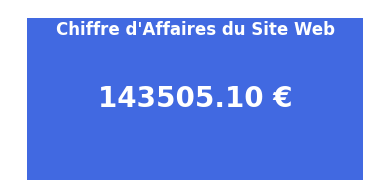

In [ ]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
df_merge_final['ca_par_article'] =  round(df_merge_final['price'] * df_merge_final['total_sales'],2)
#Calculez la somme de la colonne "ca_par_article"
ca_site_web = round(df_merge_final['ca_par_article'].sum(), 2)
#Ce résultat correspond au chiffre d'affaire du site web
print(f"Chiffre d'affaire du site web: {ca_site_web:.2f}")


plt.figure(figsize=(4, 2))

# Créer la barre
plt.bar(['Chiffre d\'Affaires Global'], [ca_site_web], color='royalblue', width=0.5)


# Supprimer les axes
plt.axis('off')
#Titre
plt.text(0, ca_site_web / 1.15, 'Chiffre d\'Affaires du Site Web',
         ha='center', va='bottom', fontsize=12, fontweight='bold', color='white')

# Ajouter le montant en gros au milieu de la barre
plt.text(0, ca_site_web/2, f"{ca_site_web:.2f} €",
         ha='center', va='center', fontsize=20, fontweight='bold', color='white')


plt.tight_layout()
plt.show()

In [ ]:
###############################
# Palmares des articles en CA #
###############################

#Effectuer le tri dans l'ordre décroissant du CA du dataset df_merge
df_merge_final.sort_values(by='ca_par_article', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge_final.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en CA
display(df_merge_final.head(20))


,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,z_score,ca_par_article
0,4352,1,225.0,0,outofstock,137.81,15940,11.0,taxable,2.0,2018-03-02 10:30:04,2018-03-02 09:30:04,Champagne,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,publish,closed,closed,champagne-egly-ouriet-grand-cru-millesime-2008,2020-03-07 11:18:45,2020-03-07 10:18:45,https://www.bottle-neck.fr/?post_type=product&...,product,6.976667,2475.0
1,5892,1,191.3,98,instock,116.06,14983,6.0,taxable,2.0,2019-03-28 10:21:36,2019-03-28 09:21:36,Champagne,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,publish,closed,closed,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,2020-04-01 09:30:09,2020-04-01 07:30:09,https://www.bottle-neck.fr/?post_type=product&...,product,5.756287,1147.8
2,4353,1,79.5,127,instock,45.91,12587,14.0,taxable,2.0,2018-03-02 10:37:26,2018-03-02 09:37:26,Champagne,Champagne Egly-Ouriet Grand Cru Brut Rosé,&nbsp;\n\nLe Rosé Grand Cru de la maison Egly-...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-rose,2020-08-22 11:45:02,2020-08-22 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,1.707665,1113.0
3,5826,1,41.2,34,instock,21.71,15325,20.0,taxable,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.320704,824.0
4,6212,1,115.0,16,instock,59.42,13996,7.0,taxable,2.0,2019-07-25 09:09:17,2019-07-25 07:09:17,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,"""Il s'agit là de la meilleure partie de l'appe...",publish,closed,closed,domaine-des-comtes-lafon-volnay-1er-cru-santen...,2020-06-16 09:30:16,2020-06-16 07:30:16,https://www.bottle-neck.fr/?post_type=product&...,product,2.993229,805.0
5,5026,1,86.8,101,instock,50.13,13913,9.0,taxable,2.0,2018-07-18 10:46:30,2018-07-18 08:46:30,Champagne,Champagne Agrapart &amp; Fils Minéral Extra Br...,"Légèrement praliné au nez, nerveux, frais, inc...",publish,closed,closed,champagne-agrapart-fils-mineral-extra-brut-bla...,2020-05-11 14:35:02,2020-05-11 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,1.972020,781.2
6,5008,1,105.0,12,instock,56.42,11602,7.0,taxable,2.0,2018-07-17 10:52:41,2018-07-17 08:52:41,Vin,Domaine des Comtes Lafon Volnay 1er Cru Santen...,"""Il s'agit là de la meilleure partie de l'appe...",publish,closed,closed,domaine-des-comtes-lafon-volnay-1er-cru-santen...,2020-06-23 15:35:02,2020-06-23 13:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,2.631098,735.0
7,5767,1,175.0,12,instock,90.42,15185,4.0,taxable,2.0,2019-03-13 14:43:22,2019-03-13 13:43:22,Vin,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,publish,closed,closed,camille-giroud-clos-de-vougeot-2016,2020-06-11 15:25:04,2020-06-11 13:25:04,https://www.bottle-neck.fr/?post_type=product&...,product,5.166014,700.0
8,6126,1,135.0,138,instock,80.33,14923,5.0,taxable,2.0,2019-06-28 17:22:27,2019-06-28 15:22:27,Champagne,Champagne Gosset Célébris Vintage 2007,Une robe somptueuse a la teinte jaune pâle eti...,publish,closed,closed,champagne-gosset-celebris-vintage-2007,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,3.717491,675.0
9,5025,1,112.0,136,instock,68.60,13914,6.0,taxable,2.0,2018-07-18 10:39:43,2018-07-18 08:39:43,Champagne,Champagne Agrapart &amp; Fils L'Avizoise Extra...,"Une cuvée surprenante, par son amer articulé a...",publish,closed,closed,champagne-agrapart-fils-lavizoise-grand-cru-20...,2020-07-09 17:05:02,2020-07-09 15:05:02

In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express

graph=px.bar(df_merge_final.head(20), x='post_title', y='ca_par_article',title="CA des 20 premiers articles",color='product_type',
text='ca_par_article', labels={'post_title': 'Produits', 'ca_par_article': 'Chiffre d\'affaires (€)'},category_orders={
        'post_title': df_merge_final.head(20)['post_title'].tolist() #Pour eviter le regroupement par couleur tout en gardant la couleur
    })


graph.update_layout(
    xaxis_tickangle=-45,
    height=600,  # Hauteur du graphique
    margin=dict(l=50, r=50, t=80, b=150),  # Marges pour accommoder les étiquettes
    yaxis=dict(
        range=[0, 2500],  # Définir la plage de l'axe Y de 0 à 3000
        dtick=500        # Définir les graduations tous les 500

    ),
    title_x=0.5,
    legend_title_text="Type de produit"  # Changer le titre de la légende#met le titre au centre
)
# Augmenter la largeur des barres
graph.update_traces(width=0.8)  # Valeur entre 0 et 1, plus la valeur est grande, plus les barres sont larges


graph.show()


In [ ]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part du CA de la ligne dans le dataset
df_merge_final['part_ca'] = round(df_merge_final['ca_par_article'] / df_merge_final['ca_par_article'].sum() * 100, 2)
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_final['ca_cumul'] = df_merge_final['part_ca'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
df_part80 = df_merge_final[df_merge_final['ca_cumul'] <= 80]
print(f"Nombre d'articles représentant 80% du chiffre d'affaires: {df_part80['ca_cumul'].count()}")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles_80 = round(df_part80.shape[0] / df_merge_final.shape[0] * 100, 2)
print(f"{proportion_articles_80}% des articles représentent 80% du chiffre d'affaires.")

Nombre d'articles représentant 80% du chiffre d'affaires: 432
60.59% des articles représentent 80% du chiffre d'affaires.


Ce code va produire un graphique qui présente :

Des barres bleues représentant la contribution individuelle de chaque article au CA
Une ligne rouge montrant le pourcentage cumulatif du CA
Une ligne horizontale pointillée marquant le seuil des 80%
Une ligne verticale pointillée et une zone verte montrant quels articles constituent 80% du CA
Une annotation indiquant quel pourcentage d'articles représente 80% du CA

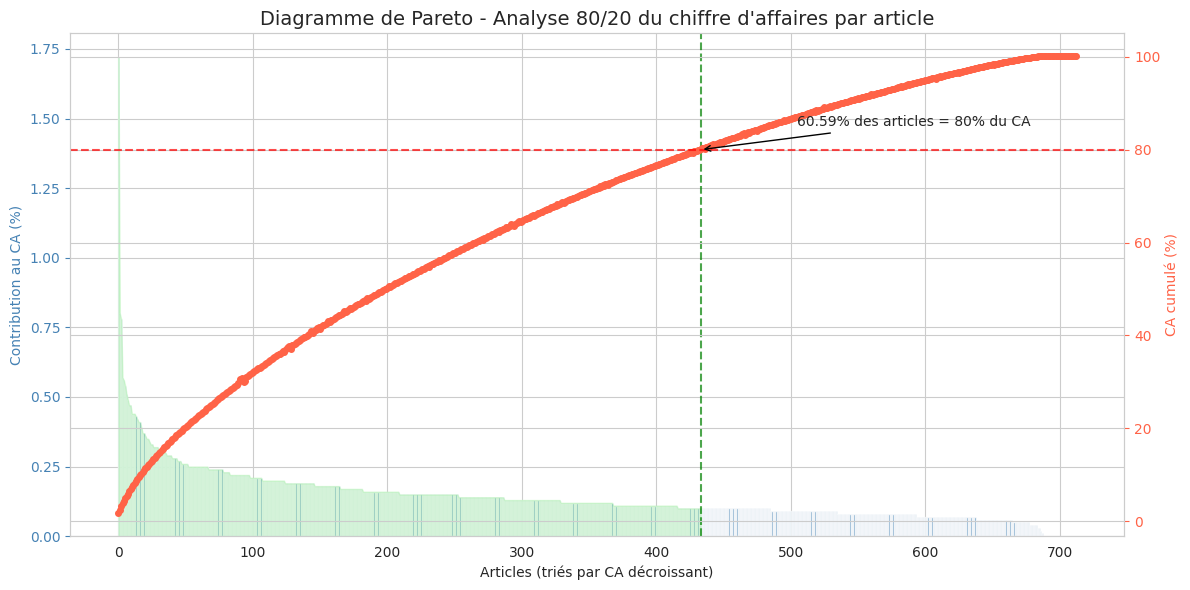

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# On s'assure que les données sont triées par CA décroissant
df_sorted = df_merge_final.sort_values('ca_par_article', ascending=False).reset_index(drop=True)

# Configuration du style
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Création d'un double axe y
ax1 = plt.subplot()
ax2 = ax1.twinx()

# Histogramme des contributions individuelles (barres)
bars = ax1.bar(range(len(df_sorted)), df_sorted['part_ca'], color='steelblue', alpha=0.8)
ax1.set_xlabel('Articles (triés par CA décroissant)')
ax1.set_ylabel('Contribution au CA (%)', color='steelblue')
ax1.tick_params(axis='y', colors='steelblue')

# Ligne de pourcentage cumulé
ax2.plot(range(len(df_sorted)), df_sorted['ca_cumul'], color='tomato', linewidth=2, marker='o', markersize=4)
ax2.set_ylabel('CA cumulé (%)', color='tomato')
ax2.tick_params(axis='y', colors='tomato')

# Ligne horizontale à 80% pour visualiser la règle de Pareto
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Seuil 80%')

# Zone colorée pour les articles dans la zone des 80%
zone_index = df_sorted['ca_cumul'].searchsorted(80)
ax1.axvline(x=zone_index, color='green', linestyle='--', alpha=0.7)
ax1.fill_between(range(zone_index+1), 0, df_sorted['part_ca'].iloc[:zone_index+1],
                 color='lightgreen', alpha=0.3)

# Ajout d'une annotation pour la règle des 80/20
plt.annotate(f"{proportion_articles_80}% des articles = 80% du CA",
             xy=(zone_index, 80), xytext=(zone_index+len(df_sorted)/10, 85),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Titre et légende
plt.title('Diagramme de Pareto - Analyse 80/20 du chiffre d\'affaires par article', fontsize=14)
plt.tight_layout()

plt.show()


In [ ]:
#import des besoins pour le wafle chart
!pip install pywaffle
from pywaffle import Waffle
import matplotlib.cm as cm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 60.6 MB/s eta 0:00:00


<ipython-input-69-f157d691b0e6>:9: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



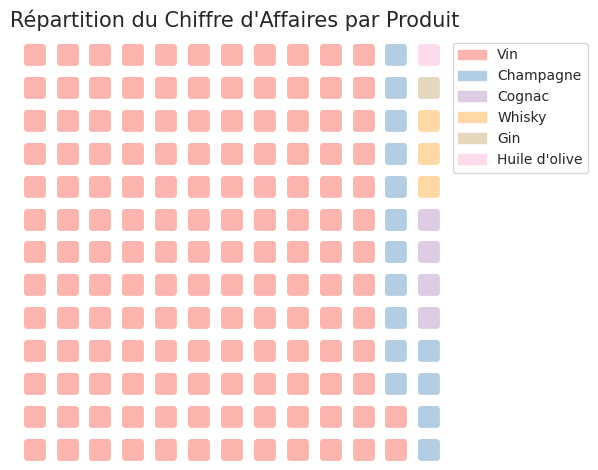

In [ ]:

ca_par_produit = df_merge_final.groupby('product_type')['ca_par_article'].sum().reset_index()
ca_par_produit = ca_par_produit.rename(columns={'product_type': 'Produit', 'ca_par_article': 'Chiffre d\'Affaires'})
ca_par_produit = ca_par_produit.sort_values('Chiffre d\'Affaires', ascending=False)

# Conversion en dictionnaire pour le waffle chart
data = dict(zip(ca_par_produit['Produit'], ca_par_produit['Chiffre d\'Affaires']))

# Création d'une liste de couleurs (au lieu d'un tableau numpy)
cmap = cm.get_cmap('Pastel1')
colors = [cmap(i/len(data)) for i in range(len(data))]

# Création du waffle chart
fig = plt.figure(

    FigureClass=Waffle,
    rows=13,  # Nombre de lignes dans la grille
    columns=13,  # Nombre de colonnes dans la grille
    values=data,
    title={'label': 'Répartition du Chiffre d\'Affaires par Produit', 'loc': 'center', 'fontsize': 15},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=colors,
    icons='square',
    block_arranging_style='new-line',
)

plt.tight_layout()
plt.show()


In [ ]:
# Ajout de la colonne de pourcentage
ca_par_produit["Pourcentage CA"] = (ca_par_produit["Chiffre d'Affaires"] / ca_par_produit["Chiffre d'Affaires"].sum() * 100).round(2)

display(ca_par_produit)

,Produit,Chiffre d'Affaires,Pourcentage CA
4,Vin,123518.0,86.07
0,Champagne,12928.6,9.01
1,Cognac,3170.2,2.21
5,Whisky,2886.6,2.01
2,Gin,504.0,0.35
3,Huile d'olive,497.7,0.35


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,z_score,ca_par_article,part_ca,ca_cumul
0,4867,1,9.9,121,instock,4.86,16148,36.0,taxable,2.0,2018-05-03 13:20:05,2018-05-03 11:20:05,Vin,Château De La Selve IGP Coteaux de l'Ardèche M...,"<div>\n\nUn rosé minéral, fruité et d’une gran...",publish,closed,closed,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,2020-08-27 09:30:15,2020-08-27 07:30:15,https://www.bottle-neck.fr/?post_type=product&...,product,-0.812765,356.4,0.25,22.84
1,4203,1,9.9,74,instock,5.01,15415,27.0,taxable,2.0,2018-02-15 14:33:42,2018-02-15 13:33:42,Vin,Mas Laval IGP Pays d'Hérault Les Pampres Blanc...,Vin de gourmandise à boire sur la fraîcheur po...,publish,closed,closed,mas-laval-igp-pays-herault-pampres-blanc-2018,2020-07-11 16:45:03,2020-07-11 14:45:03,https://www.bottle-neck.fr/?post_type=product&...,product,-0.812765,267.3,0.19,40.33
2,4275,1,14.9,62,instock,7.78,14864,24.0,taxable,2.0,2018-02-27 13:33:54,2018-02-27 12:33:54,Vin,I Fabbri Chianti Classico Lamole 2017,Un nez typique de petits fruits rouges. Une bo...,publish,closed,closed,i-fabbri-chianti-classico-lamole-2017,2020-08-22 14:35:02,2020-08-22 12:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,-0.631700,357.6,0.25,21.59
3,4726,1,12.7,0,outofstock,6.82,14950,22.0,taxable,2.0,2018-04-18 11:53:51,2018-04-18 09:53:51,Vin,François Baur Pinot Noir Schlittweg 2017,"Un éclat de fruits, de la souplesse, de la ron...",publish,closed,closed,francois-baur-pinot-noir-schlittweg-2017,2020-05-06 11:35:01,2020-05-06 09:35:01,https://www.bottle-neck.fr/?post_type=product&...,product,-0.711369,279.4,0.19,36.91
4,4647,1,28.5,45,instock,14.14,16525,22.0,taxable,2.0,2018-04-17 09:28:58,2018-04-17 07:28:58,Vin,Bernard Baudry Chinon Rouge La Croix Boissée 2017,"Sur ce sol très calcaire, la Croix Boissée dél...",publish,closed,closed,bernard-baudry-chinon-rouge-croix-boissee-2017,2020-07-31 09:31:39,2020-07-31 07:31:39,https://www.bottle-neck.fr/?post_type=product&...,product,-0.139202,627.0,0.44,8.23
5,5826,1,41.2,34,instock,21.71,15325,20.0,taxable,2.0,2019-03-27 17:59:49,2019-03-27 16:59:49,Vin,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",publish,closed,closed,agnes-levet-amethyste-2017,2020-05-21 14:00:02,2020-05-21 12:00:02,https://www.bottle-neck.fr/?post_type=product&...,product,0.320704,824.0,0.57,3.87
6,6129,1,5.2,68,instock,2.74,14570,20.0,taxable,2.0,2019-06-28 18:01:06,2019-06-28 16:01:06,Vin,Moulin de Gassac IGP Pays d'Hérault Guilhem Bl...,Nez Séduisant et puissant. Bouquet de fleurs j...,publish,closed,closed,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,2020-08-26 15:55:02,2020-08-26 13:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,-0.982967,104.0,0.07,95.34
7,4220,1,11.6,48,instock,5.75,15758,18.0,taxable,2.0,2018-02-16 10:54:27,2018-02-16 09:54:27,Vin,Xavier Frissant Touraine Amboise Chenin Les Pi...,"Un Touraine Amboise fin et élégant, un joli ch...",publish,closed,closed,frissant-chenin-pierres-2018,2020-08-27 11:45:02,2020-08-27 09:45:02,https://www.bottle-neck.fr/?post_type=product&...,product,-0.751203,208.8,0.15,57.98
8,5778,1,5.8,44,instock,3.09,15561,17.0,taxable,2.0,2019-03-15 10:20:59,2019-03-15 09:20:59,Vin,Maurel Pays d'Oc Merlot 2018,<div>Robe rouge rubis avec des reflets violine...,publish,closed,closed,maurel-pays-d-oc-merot-2018,2020-08-14 10:55:02,2020-08-14 08:55:02,https://www.bottle-neck.fr/?post_type=product&...,product,-0.961239,98.6,0.07,96.88
9,5803,1,17.1,47,instock,9.19,13572,17.0,taxable,2.0,2019-03-19 11:33:39,2019-03-19 10:33:39,Vin,Château Tour Haut-Caussan Médoc 2015,Vous trouverez dans cette cuvée du Château Tou...,publish,closed,closed,tour-haut-caussan-medoc-2015,2020-08-26 16:55:02,2020-08-26 14:55:02,https://www

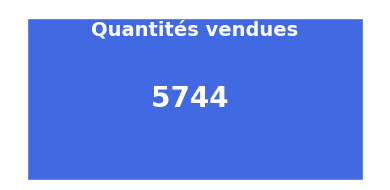

In [ ]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset df_merge
df_merge_final.sort_values(by='total_sales', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge_final.reset_index(drop=True, inplace=True)
#Afficher les 20 premier articles en quantité
display(df_merge_final.head(20))

#petit graph des quantitées vendues total
quantite_vendue = df_merge_final['total_sales'].sum()

plt.figure(figsize=(4, 2))

# Créer la barre
plt.bar(['Quantités vendues'], [quantite_vendue], color='royalblue', width=0.5)


# Supprimer les axes
plt.axis('off')
#Titre
plt.text(0, quantite_vendue / 1.15, 'Quantités vendues',
         ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')

# Ajouter le montant en gros au milieu de la barre
plt.text(0, quantite_vendue/2, f"{quantite_vendue:.0f} ",
         ha='center', va='center', fontsize=20, fontweight='bold', color='white')


plt.tight_layout()
plt.show()


In [ ]:
#Graphique en barre des 20 premiers articles avec plotly express
graph=px.bar(df_merge_final.head(20), x='post_title', y='total_sales',title="Quantités vendues des 20 premiers articles",color='product_type',
text='total_sales', labels={'post_title': 'Produits', 'total_sales': 'Quantités vendues'},)
graph.update_layout(
  xaxis_tickangle=-45,
    height=600,  # Hauteur du graphique
    margin=dict(l=50, r=50, t=80, b=150),
  yaxis=dict(

        range=[0, 40],  # Définir la plage de l'axe Y de 0 à 3000
        dtick=(5)        # Définir les graduations tous les 500

            ),
  title_x=0.5,
  legend_title_text="Type de produit"

)

graph.show()

In [ ]:
#############################
# Calculer le 20 / 80 en quantité #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
df_merge_final['part_quantite'] = round(df_merge_final['total_sales'] / df_merge_final['total_sales'].sum() * 100, 2)
#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
df_merge_final['quantite_cumul'] = df_merge_final['part_quantite'].cumsum()
#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
df_part80 = df_merge_final[df_merge_final['quantite_cumul'] <= 80]
print(f"Nombre d'articles représentant 80% des ventes en quantités: {df_part80['quantite_cumul'].count()}")
#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
proportion_articles_80 = round(df_part80.shape[0] / df_merge_final.shape[0] * 100, 2)
print(f"{proportion_articles_80}% des articles représentent 80% des ventes en quantité.")

Nombre d'articles représentant 80% des ventes en quantités: 432
60.59% des articles représentent 80% des ventes en quantité.


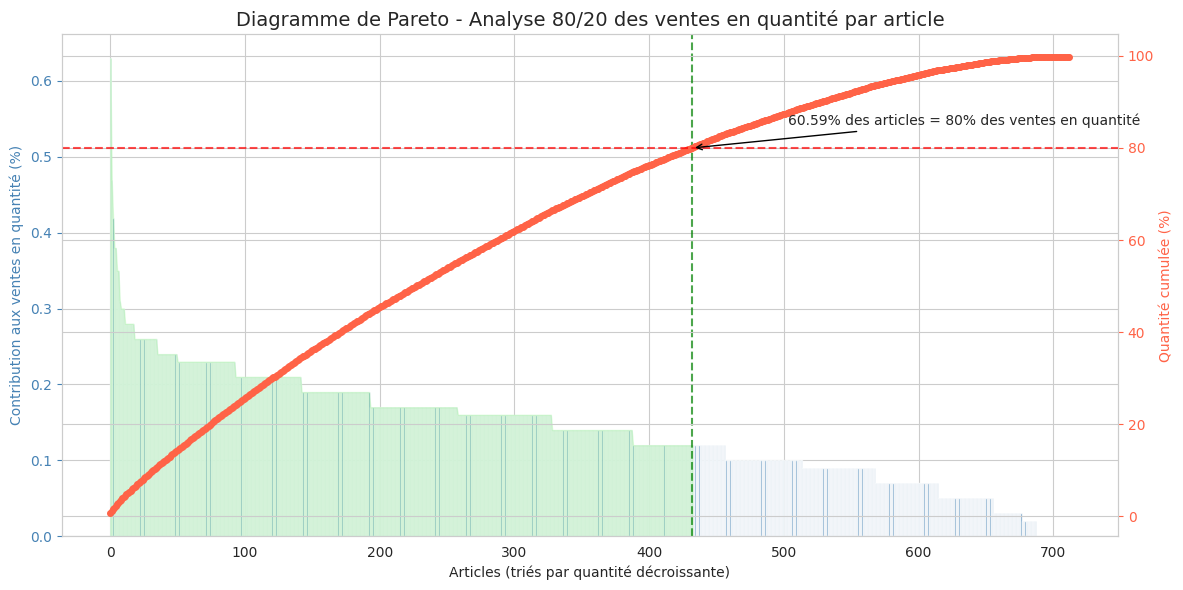

In [ ]:
#diagramme de pareto en quantité:


# On s'assure que les données sont triées par quantité décroissante
df_sorted_qte = df_merge_final

# Configuration du style
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Création d'un double axe y
ax1 = plt.subplot()
ax2 = ax1.twinx()

# Histogramme des contributions individuelles (barres)
bars = ax1.bar(range(len(df_sorted_qte)), df_sorted_qte['part_quantite'], color='steelblue', alpha=0.8)
ax1.set_xlabel('Articles (triés par quantité décroissante)')
ax1.set_ylabel('Contribution aux ventes en quantité (%)', color='steelblue')
ax1.tick_params(axis='y', colors='steelblue')

# Ligne de pourcentage cumulé
ax2.plot(range(len(df_sorted_qte)), df_sorted_qte['quantite_cumul'], color='tomato', linewidth=2, marker='o', markersize=4)
ax2.set_ylabel('Quantité cumulée (%)', color='tomato')
ax2.tick_params(axis='y', colors='tomato')

# Ligne horizontale à 80% pour visualiser la règle de Pareto
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.7, label='Seuil 80%')

# Zone colorée pour les articles dans la zone des 80%
zone_index = df_sorted_qte['quantite_cumul'].searchsorted(80)
ax1.axvline(x=zone_index, color='green', linestyle='--', alpha=0.7)
ax1.fill_between(range(zone_index+1), 0, df_sorted_qte['part_quantite'].iloc[:zone_index+1],
                 color='lightgreen', alpha=0.3)

# Ajout d'une annotation pour la règle des 80/20
plt.annotate(f"{proportion_articles_80}% des articles = 80% des ventes en quantité",
             xy=(zone_index, 80), xytext=(zone_index+len(df_sorted_qte)/10, 85),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Titre et légende
plt.title('Diagramme de Pareto - Analyse 80/20 des ventes en quantité par article', fontsize=14)
plt.tight_layout()

plt.show()

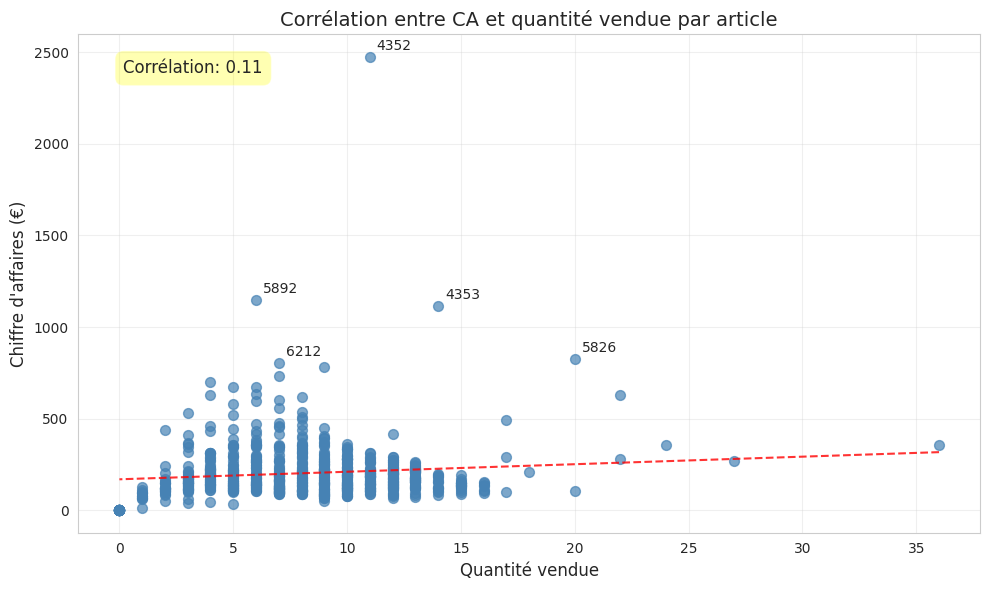

In [ ]:
# Graphique de corrélation entre CA et quantité vendues
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

# Création du nuage de points
scatter = plt.scatter(
    df_merge_final['total_sales'],
    df_merge_final['ca_par_article'],
    alpha=0.7,
    c='steelblue',
    s=50
)

# Ajout d'une ligne de tendance
z = np.polyfit(df_merge_final['total_sales'], df_merge_final['ca_par_article'], 1)
p = np.poly1d(z)
plt.plot(df_merge_final['total_sales'], p(df_merge_final['total_sales']),
         "r--", alpha=0.8)

# Calcul et affichage du coefficient de corrélation
corr = df_merge_final['total_sales'].corr(df_merge_final['ca_par_article'])
plt.annotate(f"Corrélation: {corr:.2f}",
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.3))

# Étiquettes et titre
plt.xlabel('Quantité vendue', fontsize=12)
plt.ylabel('Chiffre d\'affaires (€)', fontsize=12)
plt.title('Corrélation entre CA et quantité vendue par article', fontsize=14)

# Ajout d'annotations pour quelques produits importants
# Sélection des N produits les plus importants
top_n = 5  # Nombre de produits à étiqueter
top_products = df_merge_final.nlargest(top_n, 'ca_par_article')

for i, product in top_products.iterrows():
    plt.annotate(product['product_id'],  # Remplacez par votre colonne d'identifiant de produit
                 (product['total_sales'], product['ca_par_article']),
                 xytext=(5, 5), textcoords='offset points')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

In [ ]:
######################################
# Calcule le nombre de mois de stock #
######################################


#Création de la colonne Rotation de stock
df_merge_final['rotation_stock'] =df_merge_final['total_sales'] / df_merge_final['stock_quantity']

#Remplacement des "inf" par 0 (je prefere mettre nan que 0 pour eviter toute confusion)
df_merge_final['rotation_stock'] = df_merge_final['rotation_stock'].where(df_merge_final['rotation_stock'] != np.inf, np.nan)

#Calcul du mois_de_stock : ici c'est 1 mois (octobre) donc mois_de_stock = 1 / rotation_mensuelle
df_merge_final['mois_de_stock']=round(1/df_merge_final['rotation_stock'],2)
df_merge_final['mois_de_stock'] = df_merge_final['mois_de_stock'].where(df_merge_final['mois_de_stock'] != np.inf, np.nan)

#Effectuer le tri dans l'ordre décroissant du nombre de mois_de_stock dans le dataset df_merge
df_merge_final.sort_values(by='mois_de_stock', ascending=False, inplace=True)
#Réinitialiser l'index du dataset par un reset_index
df_merge_final.reset_index(drop=True, inplace=True)


#Graphique en barre du flop 20 des produits qui ont le plus de mois_de_stock
graph=px.bar(df_merge_final.head(20), x='post_title', y='mois_de_stock',title="Flop 20 des produits qui ont le plus de mois de stock",color='product_type',
text='mois_de_stock', labels={'post_title': 'Produits', 'mois_de_stock': 'mois en stock'},category_orders={
        'post_title': df_merge_final.head(20)['post_title'].tolist() #Pour eviter le regroupement par couleur tout en gardant la couleur
    })

graph.update_layout(
    xaxis_tickangle=-45,
    height=600,  # Hauteur du graphique
    margin=dict(l=50, r=50, t=80, b=150),  # Marges pour accommoder les étiquettes
    yaxis=dict(
        range=[0, 35],  # Définir la plage de l'axe Y de 0 à 3000
        dtick=5        # Définir les graduations tous les 500


    ),barmode='relative',
    title_x=0.5,
    legend_title_text="Type de produit", # Changer le titre de la légende #met le titre au centre

)
graph.show()



In [ ]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
df_merge_final['valorisation_stock_euros'] = round(df_merge_final['purchase_price'] * df_merge_final['stock_quantity'],2)
#Calculer la somme de la colonne "Valorisation_stock_euros"
somme_stock_euros = round(df_merge_final['valorisation_stock_euros'].sum(), 2)
print(f"Somme de la valeur de stock en euros: {somme_stock_euros:.2f}")

Somme de la valeur de stock en euros: 277022.17


In [ ]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
somme_stock_quantity = round(df_merge_final['stock_quantity'].sum(), 2)
print(f"Somme de la quantité de stock: {somme_stock_quantity:.2f}")

Somme de la quantité de stock: 16717.00


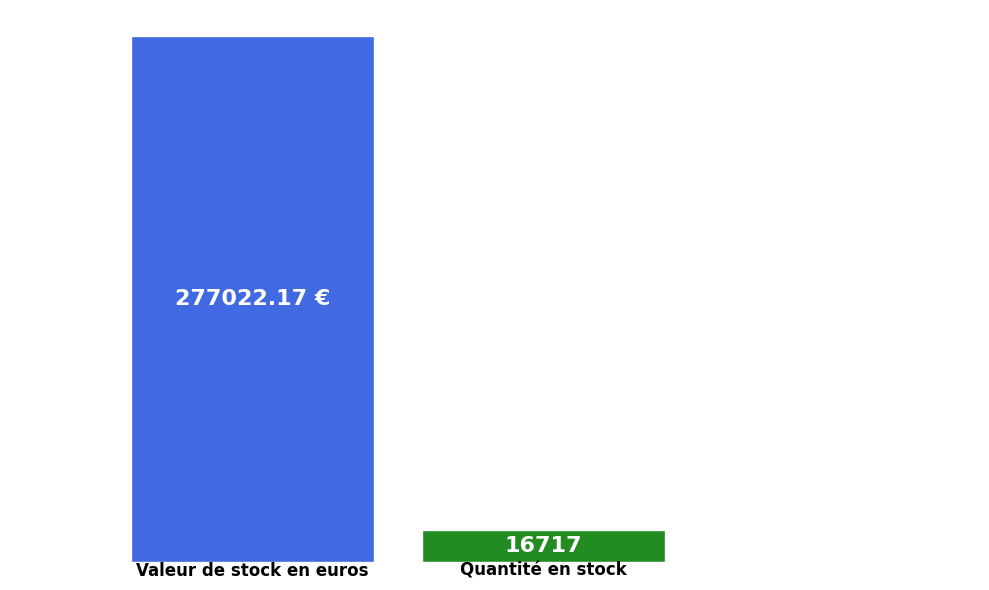

In [ ]:
#On va faire afficher els deux valeurs dans un graph
plt.figure(figsize=(10, 6))

# Position des barres
positions = [0, 0.6]  # Position pour chaque barre
largeur_barre = 0.5

# Créer les deux barres côte à côte
plt.bar([positions[0]], [somme_stock_euros], color='royalblue', width=largeur_barre, label='Valeur en euros')
plt.bar([positions[1]], [somme_stock_quantity], color='forestgreen', width=largeur_barre, label='Quantité en stock')

# Supprimer les axes
plt.axis('off')

# Ajouter les titres sous chaque barre
plt.text(positions[0], 0, 'Valeur de stock en euros',
         ha='center', va='top', fontsize=12, fontweight='bold', color='black')
plt.text(positions[1], 0, 'Quantité en stock',
         ha='center', va='top', fontsize=12, fontweight='bold', color='black')

# Ajouter les valeurs au milieu de chaque barre
plt.text(positions[0], somme_stock_euros/2, f"{somme_stock_euros:.2f} €",
         ha='center', va='center', fontsize=16, fontweight='bold', color='white')
plt.text(positions[1], somme_stock_quantity/2, f"{somme_stock_quantity}",
         ha='center', va='center', fontsize=16, fontweight='bold', color='white')

# Ajuster les limites du graphique pour s'assurer que les deux barres sont visibles
plt.xlim(-0.5, 1.5)
max_height = max(somme_stock_euros, somme_stock_quantity)


plt.tight_layout()
plt.show()

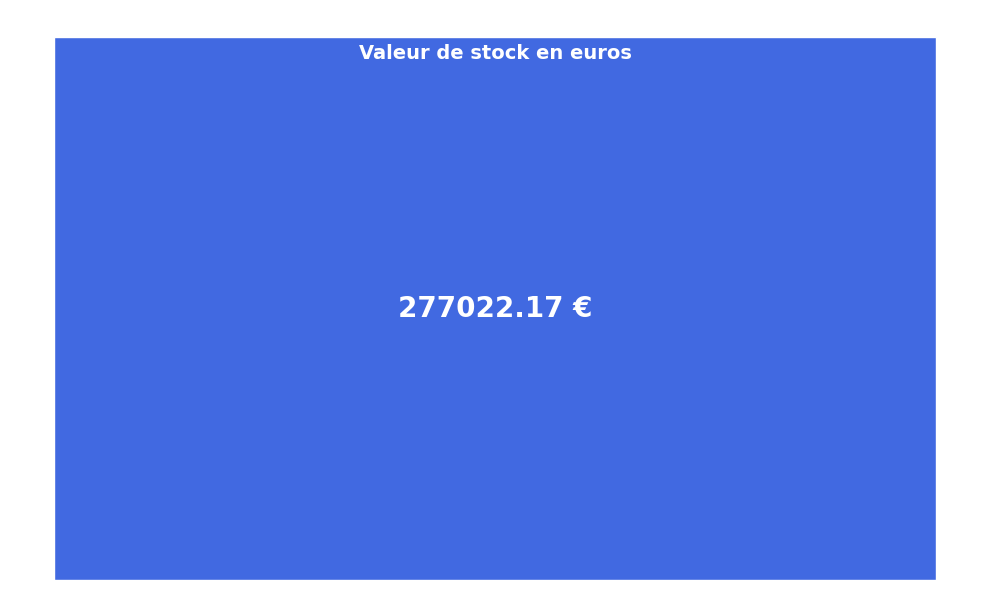

In [ ]:
plt.figure(figsize=(10, 6))

# Créer la barre
plt.bar(['valeur de stock en euros'], [somme_stock_euros], color='royalblue', width=0.5)


# Supprimer les axes
plt.axis('off')
#Titre
plt.text(0, somme_stock_euros / 1.05, 'Valeur de stock en euros',
         ha='center', va='bottom', fontsize=14, fontweight='bold', color='white')

# Ajouter le montant en gros au milieu de la barre
plt.text(0, somme_stock_euros/2, f"{somme_stock_euros:.2f} €",
         ha='center', va='center', fontsize=20, fontweight='bold', color='white')


plt.tight_layout()
plt.show()

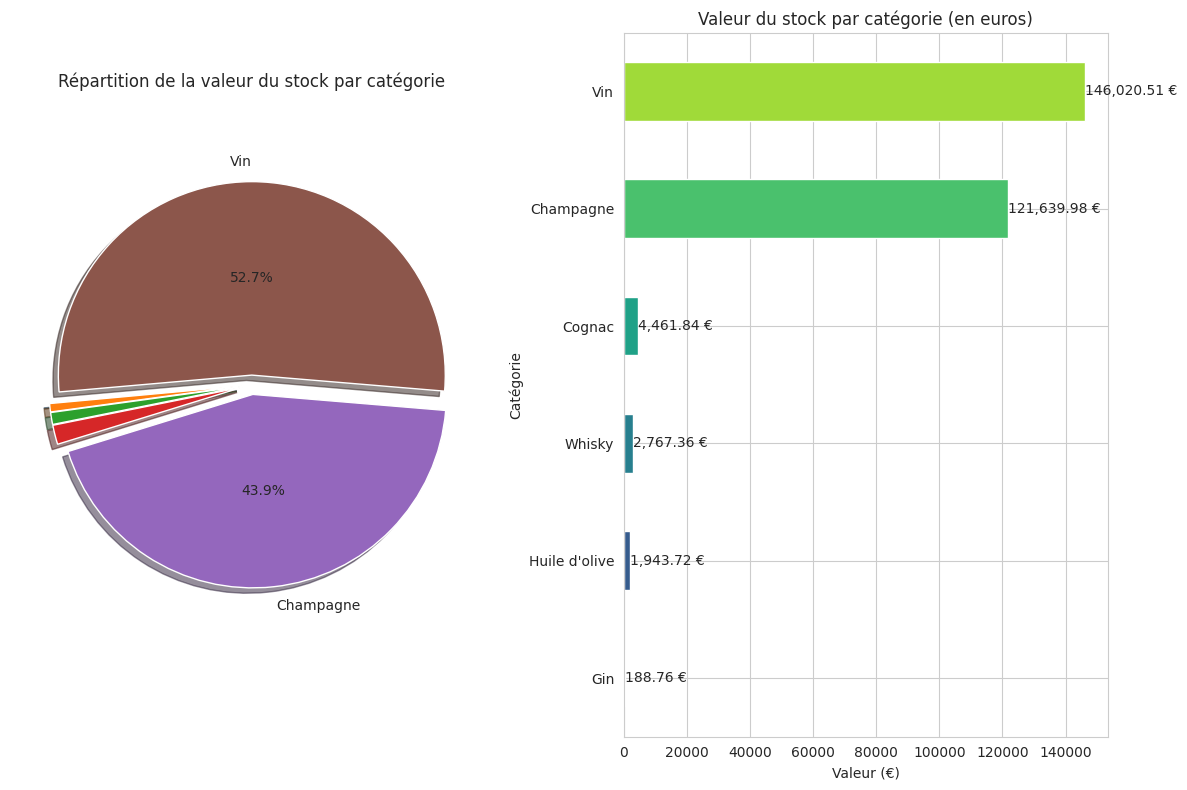

In [ ]:
value_by_category = df_merge_final.groupby('product_type')['valorisation_stock_euros'].sum().sort_values(ascending=True)
# Création du graphique
plt.figure(figsize=(12, 8))

# Créer une liste de labels où seuls "champagne" et "vin" sont visibles
labels = []
for category in value_by_category.index:
    if category.lower() in ["champagne", "vin"]:
        labels.append(category)
    else:
        labels.append("")  # Label vide pour les autres catégories


def make_autopct(categories_to_show):
    def autopct(pct, values):
        index = autopct.counter
        label = labels[index]
        autopct.counter += 1
        return f'{pct:.1f}%' if label in categories_to_show else ''
    autopct.counter = 0
    return lambda pct: autopct(pct, value_by_category)

# Définir les catégories pour lesquelles afficher les %
categories_to_display_pct = ["Champagne", "Vin"]



# 1. Graphique camembert de la répartition par catégorie
plt.subplot(1, 2, 1)
plt.pie(value_by_category, labels=labels,pctdistance=.5, autopct=make_autopct(categories_to_display_pct),
        startangle=185, shadow=True, explode=[0.05]*len(value_by_category),rotatelabels=False)
plt.title('Répartition de la valeur du stock par catégorie', pad=40)



# 2. Graphique en barres horizontales pour mieux voir les proportions
plt.subplot(1, 2, 2)
value_by_category.plot(kind='barh', color=sns.color_palette('viridis', len(value_by_category)))
plt.title('Valeur du stock par catégorie (en euros)')
plt.xlabel('Valeur (€)')
plt.ylabel('Catégorie')
# Ajouter les valeurs au bout des barres
for i, value in enumerate(value_by_category):
    plt.text(value + 100, i, f'{value:,.2f} €', va='center')

plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [ ]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
df_merge_final['prix_ht'] = round(df_merge_final['price'] / (1 + 0.20), 2)
#Création de la colonne Taux de marge
df_merge_final['taux_marge'] = round(((df_merge_final['prix_ht'] - df_merge_final['purchase_price']) / df_merge_final['prix_ht'])*100, 2)

#Afficher le prix minimum de la colonne "taux_marge"
display(df_merge_final['taux_marge'].min())
#Afficher le prix maximum de la colonne "taux_marge"
display(df_merge_final['taux_marge'].max())

-635.1

47.75

In [ ]:
#affichage de la ligne avec un taux de marge inférieur à 0
display(df_merge_final.loc[df_merge_final['taux_marge'] < 0])
print("Cet article est en vente a perte (Acheté 77,48 et revendu 12,65)-->possible inversion des montants?")

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,product_type,post_title,post_excerpt,post_status,comment_status,ping_status,post_name,post_modified,post_modified_gmt,guid,post_type,z_score,ca_par_article,part_ca,ca_cumul,part_quantite,quantite_cumul,rotation_stock,mois_de_stock,valorisation_stock_euros,prix_ht,taux_marge
697,4355,1,12.65,97,instock,77.48,12589,0.0,taxable,2.0,2018-03-02 10:46:10,2018-03-02 09:46:10,Champagne,Champagne Egly-Ouriet Grand Cru Blanc de Noirs,Le Blanc de Noirs représente le meilleur du sa...,publish,closed,closed,champagne-egly-ouriet-grand-cru-brut-blanc-de-...,2020-08-13 10:15:02,2020-08-13 08:15:02,https://www.bottle-neck.fr/?post_type=product&...,product,-0.713179,0.0,0.0,100.11,0.0,99.72,0.0,NaN,7515.56,10.54,-635.1


Cet article est en vente a perte (Acheté 77,48 et revendu 12,65)-->possible inversion des montants?


In [ ]:
#création d'un dataframe avec les taux positifs
df_marges_positifs = df_merge_final[df_merge_final['taux_marge'] > 0]
#Afficher le prix minimum de la colonne "taux_marge"
print(f"Taux mini : {df_marges_positifs['taux_marge'].min()}")
#Afficher le prix maximum de la colonne "taux_marge"
print(f"Taux max : {df_marges_positifs['taux_marge'].max()}")

Taux mini : 22.8
Taux max : 47.75


In [ ]:
#création d'un dataframe avec le taux de marge moyen par type de produit
df_marge_moyenne_par_type = df_merge_final.groupby('product_type')['taux_marge'].mean().reset_index()
#Arrondir à 2 décimales
df_marge_moyenne_par_type['taux_marge'] = round(df_marge_moyenne_par_type['taux_marge'], 2)
df_marge_moyenne_par_type.sort_values(by='taux_marge', ascending=False, inplace=True)

#Afficher le dataframe
display(df_marge_moyenne_par_type.head())
#Affichage dans un graphique du taux de marge par type de produit
fig = px.bar(
    df_marge_moyenne_par_type,
    x='product_type',
    y='taux_marge',
    title="Taux de marge par type de produit",
    color='product_type',
    text='taux_marge',
    labels={'product_type': 'Type de produit', 'taux_marge': 'Taux de marge (%)'},
    category_orders={
        'product_type': df_marge_moyenne_par_type['product_type'].tolist()
    }
)
fig.show()



fig = px.sunburst(
    df_marge_moyenne_par_type,
    path=['product_type'],
    values='taux_marge',
    color='taux_marge',
    color_continuous_scale='Blues',
    title="Taux de marge par type de produit (Sunburst)"
)
fig.show()

fig = px.pie(
    df_marge_moyenne_par_type,
    names='product_type',
    values='taux_marge',
    title="Répartition des taux de marge moyens par type de produit",
    hole=0.4  # donut style
)
fig.show()

,product_type,taux_marge
1,Cognac,45.07
5,Whisky,44.92
2,Gin,42.80
4,Vin,38.01
3,Huile d'olive,25.01


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

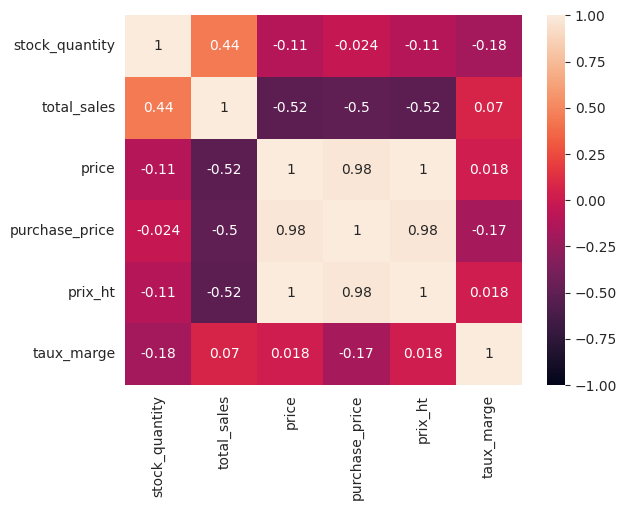

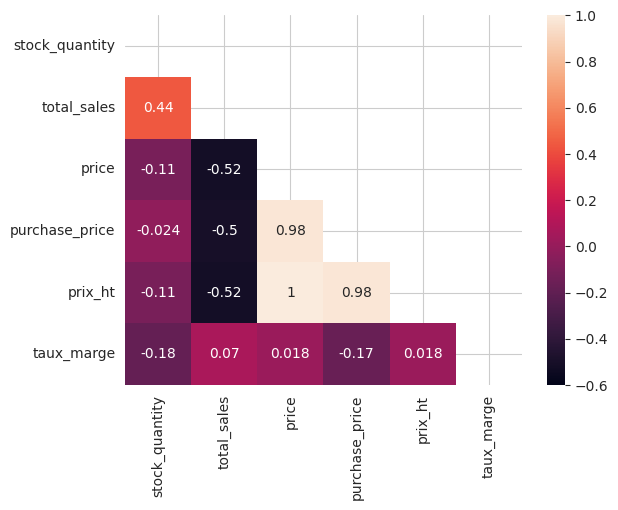

In [ ]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
#Création d'un heatmap de correlation avec les variables stock, sales et price
#prix, prix d’achat, stock, ventes, prix HT et taux de marge,
graph=sns.heatmap(df_merge_final[['stock_quantity', 'total_sales', 'price','purchase_price','prix_ht','taux_marge']].corr(),vmin=-1,vmax=1, annot=True)

plt.show()

#on peut également créer un mask pour n'afficher qu'une demi heatmap
mask = np.triu(np.ones_like(df_merge_final[['stock_quantity', 'total_sales', 'price','purchase_price','prix_ht','taux_marge']].corr()))
sns.heatmap(df_merge_final[['stock_quantity', 'total_sales', 'price','purchase_price','prix_ht','taux_marge']].corr(),vmin=-0.6,vmax=1, annot=True, mask=mask)
plt.show()


# **a completer**

In [ ]:
#Que peut-on conclure des correlations ?

#Prix et purchase_price (corrélation de 0.98) : Très forte relation, indiquant que le prix de vente est fortement aligné sur le prix d'achat
#prix_ht et purchase_price (corrélation de 0.98) : Même constat, prix HT et prix d'achat sont très liés



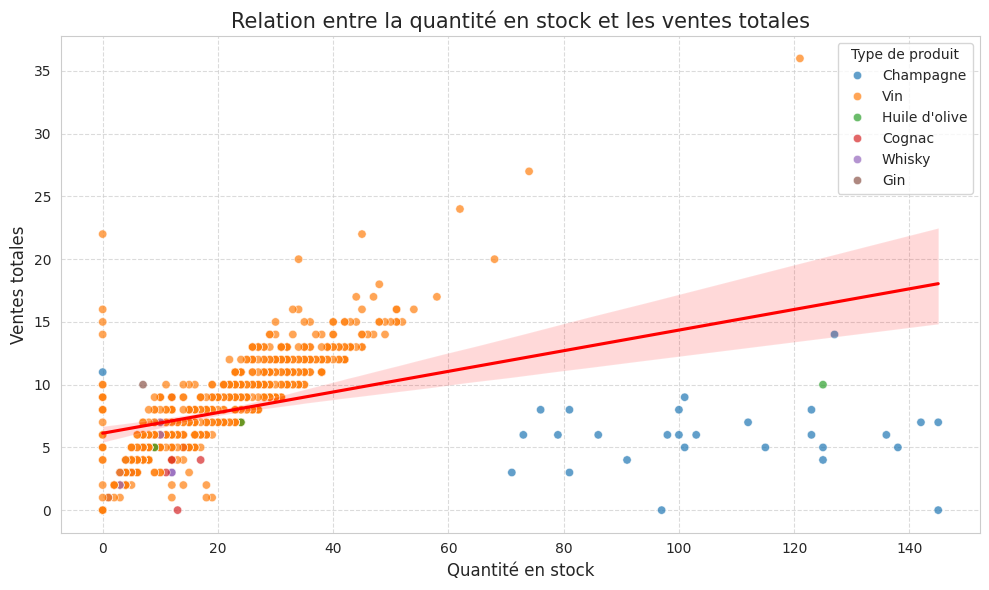

In [ ]:


# Définir la taille de la figure
plt.figure(figsize=(10, 6))

# Créer le scatter plot
sns.scatterplot(data=df_merge_final,
                x='stock_quantity',
                y='total_sales',
                alpha=0.7,  # Transparence des points
                hue='product_type')  # Couleur différente par type de produit

# Ajouter une ligne de tendance
sns.regplot(data=df_merge_final,
            x='stock_quantity',
            y='total_sales',
            scatter=False,  # Ne pas ajouter de points supplémentaires
            line_kws={"color": "red"})

# Ajouter des labels et un titre
plt.title('Relation entre la quantité en stock et les ventes totales', fontsize=15)
plt.xlabel('Quantité en stock', fontsize=12)
plt.ylabel('Ventes totales', fontsize=12)

# Ajouter une légende
plt.legend(title='Type de produit')

# Ajouter une grille en arrière-plan
plt.grid(True, linestyle='--', alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [ ]:
#Mettre le dataset df_merge sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.


In [ ]:
df_merge_final.to_excel('my_dataset.xlsx', index=False)
files.download('my_dataset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>